# **College Event Feedback Analysis — Starter Notebook**

1.Installing libraries

In [1]:
!pip install pandas numpy matplotlib vaderSentiment wordcloud


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.1 MB/s eta 0:00:00


2.Importing libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
import string

pd.set_option('display.max_colwidth', 200)


3.Uploading csv excel file

In [6]:
from google.colab import files
uploaded = files.upload()  # pick student_event_feedback.csv

df = pd.read_csv('student_event_feedback.csv')
df.head()


Saving student_event_feedback.csv to student_event_feedback.csv


,Timestamp,Event_Name,Event_Type,Department,Rating,Feedback_Comment
0,02-11-2024 04:18,AI Ethics in Industry,Guest Lecture,CSE,2,"AI Ethics in Industry (Guest Lecture) had issues with wifi, registration, air conditioning."
1,07-09-2024 17:17,UX Research in the Wild,Guest Lecture,CHE,4,"UX Research in the Wild (Guest Lecture) was useful takeaways, good pace."
2,21-07-2025 04:46,Intro to Machine Learning,Workshop,CHE,5,"Intro to Machine Learning (Workshop) was clear slides, learnt a lot."
3,14-08-2025 23:33,Smart City Hack,Hackathon,BIO,2,"Smart City Hack (Hackathon) had issues with wifi, timing, seating."
4,10-10-2024 23:06,Green Energy Futures,Seminar,CE,4,"Green Energy Futures (Seminar) was excellent speakers, supportive volunteers, good pace."


4.Data cleaning

In [7]:
df.columns = [c.strip().lower().replace(" ", "_") for c in df.columns]
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df = df.dropna(subset=['rating'])
df = df.drop_duplicates()
print(df.shape)
df.head()



(1000, 6)


,timestamp,event_name,event_type,department,rating,feedback_comment
0,02-11-2024 04:18,AI Ethics in Industry,Guest Lecture,CSE,2,"AI Ethics in Industry (Guest Lecture) had issues with wifi, registration, air conditioning."
1,07-09-2024 17:17,UX Research in the Wild,Guest Lecture,CHE,4,"UX Research in the Wild (Guest Lecture) was useful takeaways, good pace."
2,21-07-2025 04:46,Intro to Machine Learning,Workshop,CHE,5,"Intro to Machine Learning (Workshop) was clear slides, learnt a lot."
3,14-08-2025 23:33,Smart City Hack,Hackathon,BIO,2,"Smart City Hack (Hackathon) had issues with wifi, timing, seating."
4,10-10-2024 23:06,Green Energy Futures,Seminar,CE,4,"Green Energy Futures (Seminar) was excellent speakers, supportive volunteers, good pace."


5.Sentiment analysis

In [9]:
analyzer = SentimentIntensityAnalyzer()

def label_sentiment(score):
    if score <= -0.05: return 'Negative'
    elif score >= 0.05: return 'Positive'
    else: return 'Neutral'

df['sentiment_score'] = df['feedback_comment'].astype(str).apply(lambda t: analyzer.polarity_scores(t)['compound'])
df['sentiment_label'] = df['sentiment_score'].apply(label_sentiment)

df[['feedback_comment','sentiment_score','sentiment_label']].head()


,feedback_comment,sentiment_score,sentiment_label
0,"AI Ethics in Industry (Guest Lecture) had issues with wifi, registration, air conditioning.",0.0000,Neutral
1,"UX Research in the Wild (Guest Lecture) was useful takeaways, good pace.",0.7003,Positive
2,"Intro to Machine Learning (Workshop) was clear slides, learnt a lot.",0.3818,Positive
3,"Smart City Hack (Hackathon) had issues with wifi, timing, seating.",0.4019,Positive
4,"Green Energy Futures (Seminar) was excellent speakers, supportive volunteers, good pace.",0.8720,Positive


6.Visualization.
  Rating distribution

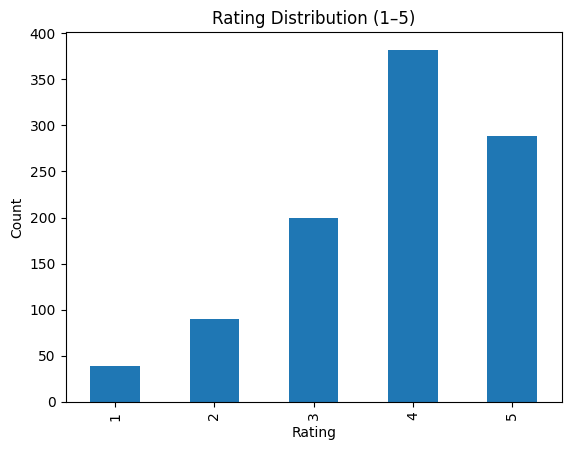

In [10]:
df['rating'].value_counts().sort_index().plot(kind='bar')
plt.title("Rating Distribution (1–5)")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()


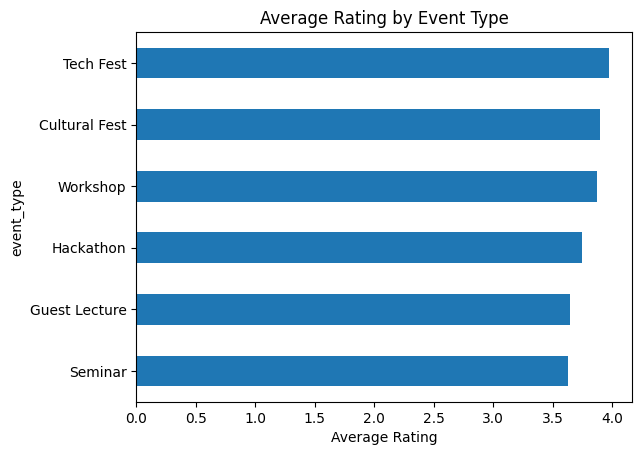

In [11]:
df.groupby('event_type')['rating'].mean().sort_values().plot(kind='barh')
plt.title("Average Rating by Event Type")
plt.xlabel("Average Rating")
plt.show()


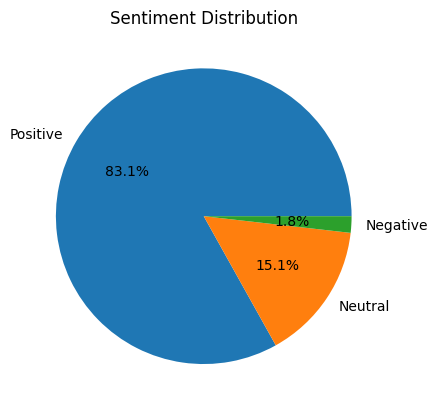

In [12]:
df['sentiment_label'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Sentiment Distribution")
plt.ylabel("")
plt.show()


7.Survey insights

In [13]:
print(df.groupby('event_name')['rating'].mean().sort_values(ascending=False).head(3))

print("Correlation:", df[['rating','sentiment_score']].corr().iloc[0,1])

neg = df[df['sentiment_label']=='Negative']['feedback_comment'].str.lower()
neg = neg.str.replace(f"[{string.punctuation}]", " ", regex=True)
tokens = " ".join(neg).split()
stop = set(STOPWORDS) | {'event','events','workshop','seminar','fest','cultural','guest','lecture'}
tokens = [t for t in tokens if t not in stop and len(t) > 3]
print(Counter(tokens).most_common(15))

event_name
IoT & Robotics Arena      4.269231
24hr HealthTech Hack      4.160000
ByteBlast Coding Games    4.111111
Name: rating, dtype: float64
Correlation: 0.7068709045739533
[('campus', 18), ('problem', 18), ('solver', 18), ('hackathon', 18), ('issues', 7), ('room', 4), ('adequate', 4), ('timing', 4), ('interactive', 4), ('basic', 3), ('seating', 3), ('average', 3), ('experience', 3), ('topics', 3), ('fine', 3)]


8.Export results

In [14]:
df.to_csv("student_event_feedback_with_sentiment.csv", index=False)

from google.colab import files
files.download("student_event_feedback_with_sentiment.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>